# Projet equation d'état de disques durs en 2D par dynamique Brownienne. 


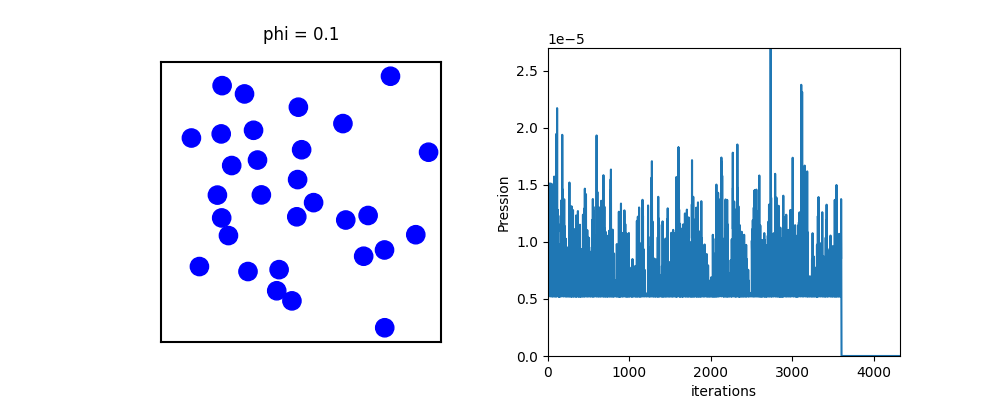


Il est courant de simuler le mouvement de petits objets constituant un fluide (atomes, molécules...) ou immergés dans un fluide (nanoparticules...) afin de déterminer les propriétés thermodynamiques du fluide ou du mélange fluide/particules appelé "dispersion". Pour ceci, on calcule les trajectoires de tous les objets grâce à la loi de Newton (masse x accélération = somme des forces), en prenant en compte les forces d'interaction entre les objets (van der Waals, électrostatique, etc). Les positions des $N$ objets simulés sont stockées dans les tableaux $x_i$ et $y_i$ en 2D. Les forces subies par les objets dans les directions x et y sont notées $Fx_i$ et $Fy_i$.  

Dans le cas des dispersions, on ne simule en général pas le solvent explicitement. On inclut seulement les nanoparticules et on mime l'effet des collisions particules/solvant avec une force fluctuante rajoutée aux autres forces subies par les nanoparticules. Il s'agit de la méthode appelée dynamique brownienne.

Voici une vidéo montrant le résultat de ce type de simulation, dans le cadre de ce projet : https://youtu.be/QrTDIwFw8dg C'est le résultat que vous allez obtenir. 

Dans ce contexte, et sous certaines hypothèses, si on connait les positions des nanoparticules $x_i$, l'équation de Newton se simplifie pour permettre de calculer les nouvelles positions $x_{new,i}$ après un intervalle de temps $dt$ : 
$$x_{new,i} = x_i + dt \frac{D}{kT} F_i + \sqrt{2D dt} X(t)$$
où $D$ est le coefficient de diffusion des nanoparticules, $k$ est la constante de Boltzmann, $T$ est la température en K et $X(t)$ est un nombre tiré au hasard dans une distribution gaussienne de moyenne 0 et d'écart type 1. 

Dans ce projet, nous vous proposons de compléter l'écriture d'un code de dynamique brownienne et de l'utiliser pour mesurer l'équation d'état d'une dispersion de disques durs en 2D (analogue d'une suspension de sphères dures de 3D).

## Implémentation de la simulation 

NB : il est recommandé, dans la mesure du possible, d'exécuter le programme à chaque question pour vérifier que tout fonctionne à chaque fois. Pour ceci, vous pouvez interrompre le programme juste après vos modifications en y ajoutant `sys.exit()`. 

NB2 : Quand votre programme fonctionnera, mais que vous voudrez accélérer son exécution, décommentez la ligne `from numba import jit` au début, ainsi que les lignes `@jit(nopython=True)`. Ceci permettra de le faire fonctionner beaucoup plus vite. Il faudra peut être installer `numba` en tapant `conda install numba` dans un terminal.  

1. Dans le programme ci-dessous, sur la figure de gauche, dessiner les parois de la boîte dans laquelle se trouvent les objets. Il s'agit d'un carré allant du coin inférieur gauche (-L,-L) au coin supérieur droit (+L,+L). Sur la figure de droite, ajoutez les étiquettes 'iteration' sur l'axe des abscisses et 'Pression' sur l'axe des ordonnées. 

2. Les disques ont un rayon noté `a`. Les positions de leurs centres $(x,y)$ sont donc dans l'intervalle $[-L+a, L-a]$. Créez deux tableaux numpy `x` et `y` contenant leurs positions initiales tirées au hasard. Pour ceci, vous pouvez utiliser la fonction `uniform()` du module `numpy.random`.   

3. A ce stade, il est tout à fait possible que des disques se chevauchent. Vous allez créer une fonction `getOverlaps()` qui prend en entrée les positions des centres des disques $x$ et $y$, et qui retourne une liste de paires d'indices correspondant aux paires de particules qui se chevauchent. Par exemple, si les particules 25 et 37 se chevauchent, ainsi que les particules 17 et 2, la liste sera \[(25,37),(17,2)\]. Dans la fonction, il y a déjà 2 boucles `for i` et `for j` qui permettent de scanner toutes les paires de particules d'indices $i$ et $j$. Dans ces boucles : 
    1. Créez un tableau $r$ de longueur 2 représentant le vecteur allant de $x_i$ à $x_j$. 
    2. Créez une variable $R$ qui contient la norme de $r$, i.e. la distance entre les centres des particules $i$ et $j$.
    3. Ensuite, si les particules se chavauchent (implémentez un test pour ça), rajoutez (i,j) à la liste `overlappingPairs`. 
    
4. Il faut maintenant régler les problèmes des particules qui se chevauchent. Ceci est fait dans la fonction `deoverlapPairs`. Dans la boucle sur les indices (i,j) : 
    1. implémentez à nouveau les calculs de $r$ et $R$ ci-dessus,  
    2. Créez un tableau $rr = r/R$.
    3. Définissez `shift =  (2*a-R)/2*1.02`.
    4. Ajoutez au vecteur $(x_i,y_i)$ la quantité `-shift*rr` et au vecteur $(x_j,y_j)$ la quantité ` shift*rr`.
Notez que cette fonction calcule aussi la contribution à la pression due à chaque collision. 
        
5. Appelez la fonction `deoverlap()` après avoir créé $x$ et $y$ et vérifiez sur le tracé qu'il n'y a plus aucuns disques qui se chevauchent. 

6. Créez des tableau X et Y de taille (N,Nt) dont les valeurs sont tirées au hasard dans une distribution gaussienne de moyenne 0 et d'écart type 1. Pour ceci, aidez vous de la documentation de la fonction `normal()` du module `numpy.random`. 

7. Implémentez les déplacements aléatoires browniens dans la boucle sur le "temps" k. Il s'agit du terme $\sqrt{2D dt} X(t)$ à rajouter à $x$ et du terme $\sqrt{2D dt} Y(t)$ à rajouter à $y$. Notez que les déplacements dûs aux forces de collision sont déjà implémentés dans `deoverlapPairs()`. 
       
8. Implémentez une fonction `Pmodele(phi)` qui retourne le modele d'équation d'état de disques suivant 
$$P(\phi)=\rho kT \frac{1+\phi^2/8}{(1-\phi)^2}$$
où $\rho=\phi/(\pi a^2)$ est la densité en disques. Lancez une simulation pour $\phi=0.1$ et comparez la valeur de la pression obtenue dans la simulation à celle de `Pmodele`. Si les valeurs sont raisonnablement proches (<10%) vous pouvez passer à la suite. Sinon il y a certainement un bug. 


In [1]:
from pylab import *
from time import sleep
from numpy.random import uniform
#from numba import jit 
close('all') 
%matplotlib tk
ion()

# rayon des particules 
a = 5e-9
# nombre de particules 
N = 30
# Energie thermique 
kT = 4.11e-21
# viscosite du solvant 
eta = 0.001 
# mobilite des particules 
mobility = 1/(6*pi*eta*a)
# Coefficient de diffusion 
D = mobility*kT
# "volume" (2D) des particules
Vp = pi*a**2
# pas de temps 
dt = 0.125e-8
# nombre de pas de temps 
Nt = 10000
# nombre de pas de temps ignorés pour le transitoire initial 
warmUp = 1000

def BD(phi):

    # grandeurs dependant de phi, la fraction volumique 
    L = sqrt( N*Vp / (4*phi) ) 
    V = 4*L*L
    rho = N/V

    # creation d'une figure 
    fig3, ax = subplots(1, 2, figsize=(10,4))
    ax[0].set_title(f'phi = {phi}')
    ax[0].axis('equal') 
    ax[0].axis('off')

    #-----------------------------------
    # 1. Question 1 ici 
 
    #-----------------------------------

    #-----------------------------------
    # 2. Question 2 ici : remplacez les  2 lignes suivantes
    x = zeros(N)
    y = zeros(N)
    #-----------------------------------

#    @jit(nopython=True)
    def getOverlaps(x, y):
        overlappingPairs = [] 
        for i in range(len(x)):
            for j in range(i):
                #-----------------------------------
                # 3. Question 3 ici
                # 3.A : 
                pass # effacez cette ligne quand vous repondez
                # 3.B : 

                # 3.C : 

                #-----------------------------------    
        return overlappingPairs

#    @jit(nopython=True)
    def deoverlapWalls(x,y,P):
        overlapWalls = False 
        for i in range(len(x)):
            if x[i]> L-a: 
                shift = 2*( x[i]-(L-a))
                x[i] -= shift
                P    += shift**2/dt*kT/D
                overlapWalls = True 
            if x[i]<-L+a: 
                shift = 2*((-L+a)-x[i])
                x[i] += shift 
                P    += shift**2/dt*kT/D
                overlapWalls = True 
            if y[i]> L-a: 
                shift = 2*( y[i]-(L-a))
                y[i] -= shift
                P    += shift**2/dt*kT/D
                overlapWalls = True 
            if y[i]<-L+a:
                shift = 2*((-L+a)-y[i])
                y[i] += shift
                P    += shift**2/dt*kT/D
                overlapWalls = True 
        return x, y, P, overlapWalls

    def deoverlapPairs(overlappingPairs, x, y, P):
        for i,j in overlappingPairs:
            #-----------------------------------
            # 4. Question 4 ici
            # 4.A : 
            pass # effacez cette ligne quand vous repondez
            # 4.B

            # 4.C

            # 4.D

            #-----------------------------------
            F = shift/dt *kT/D * rr
            P += dot(r,F)
        return x, y, P

    def deoverlap(x,y,P):
        overlapWalls = True
        while overlapWalls:
            # Deoverlapping all pairs 
            overlappingPairs = getOverlaps(x,y)
            c = 0
            while len(overlappingPairs)!=0 and c<10:
                c += 1
                x, y, P = deoverlapPairs(overlappingPairs, x, y, P) 
                overlappingPairs = getOverlaps(x,y)
            # Here, pairs are non-overlapping. 
            # However deoverlapping pairs may create overlapping with walls 
            x, y, P, overlapWalls = deoverlapWalls(x, y, P)
            # which may in turn create overlaps with pairs... 
        return x, y, P

    P=0 
    #-----------------------------------
    # 5. Question 5 ici

    #-----------------------------------

    # Trace des disques sous la forme de "patches" : vous n'avez pas vu ca en cours. 
    # Ne vous attardez pas sur les détails de ces lignes sauf si vous êtes curieu.x.ses. 
    C = []
    for i in range(N):
        C.append(Circle((x[i],y[i]),a, color='blue'))
        ax[0].add_patch(C[-1])

    #-----------------------------------
    # 6. Question 6 ici

    #-----------------------------------

    # Initialisation du tableau des pressions instantannees
    P = zeros(Nt) 
    # Creation d'une figure pour le trace de la pression au cours du temps. 
    Pline, = ax[1].plot(P)

    for k in range(Nt):

        #-----------------------------------
        # 7. Question 7 ici
        # Deplacements aleatoires browniens 

        #-----------------------------------

        # gestion des collisions qui contribuent à la pression P 
        x, y, P[k] = deoverlap(x, y, P[k]) 

        # On finit le calcul de la pression 
        P[k] = rho*kT + P[k]/(2*V) 

        # Trace 
        if (k+1)%200==0:
            for i in range(N):
                C[i].center = x[i], y[i]
            Pline.set_ydata(P)
            if k>warmUp : 
                ax[1].set_ylim(0,max(P[warmUp:]))
            ax[1].set_xlim(0,k*1.2)
            draw() 
            pause(0.01)
            
    Pmean = mean(P[warmUp:])
    return Pmean   


# Lancement du calcul pour phi=0.1 
phi = 0.1
P = BD(phi)

#-----------------------------------
# 8. Question 8 ici

#-----------------------------------


## Utilisation de la simulation pour obtenir une équation d'état

L'équation d'état est la variation de la pression en fonction de la fraction volumique $\phi$. 

1. Créez un tableau de fractions volumiques `phi` contenant 5 valeurs entre 0.05 et 0.3. 
2. Pour chaque valeur de phi, lancez la simulation avec la fonction `BD()` et stockez chaque pression calculée dans une liste `Pnum`. 
3. Créez un second tableau de fractions volumiques `phith` contenant 100 valeurs entre 0.01 et 0.35. 
4. Pour chaque valeur de phith, calculez la pression idéale $P_{id}=\rho kT$ ainsi que la pression $P_{th}$ prédite par le modèle. 
5. Créez une figure représentant ces 3 équations d'état : 
    - Pression simulée en symboles, avec label 'simulation'
    - Pression idéale en tirets noirs, avec label 'idéal'
    - Pression modèle en courbe continue, avec label 'modèle'
    - ajoutez les noms des axes ('phi' et 'pression') et la légende. 
6. Commentez cette figure (précision des calculs, quelle courbe est au-dessus / en-dessous d'une autre et pourquoi...) 

Si vous avez encore du temps, vous pouvez étudier l'effet de N (ça ne devrait pas bien marcher avec trop peu de particules dans la boîte), l'effet de Nt (sur des temps de simulation trop courts, les statistiques sont mauvaises et le régime transitoire non-physique (warmUp) est trop prépondérant). Vous pouvez aussi essayer de colorer les particules dans l'animation en fonction de la force $F$ qu'elles subissent lors des collisions. Vous pouvez encore rajouter des déplacements dûs à une force électrostatique répulsive en $F(r)=A kT exp(-r/a)/r$ après les déplacements browniens (A est une constante d'ordre 1 à choisir et/ou faire varier, et est liée à la charge électrique des nanoparticules).  


In [1]:
# a vous... 
